# Dummy classifiers

In [1]:
import pandas as pd
uri = "https://gist.githubusercontent.com/guilhermesilveira/4d1d4a16ccbf6ea4e0a64a38a24ec884/raw/afd05cb0c796d18f3f5a6537053ded308ba94bf7/car-prices.csv"
data = pd.read_csv(uri)
data.head()

,Unnamed: 0,mileage_per_year,model_year,price,sold
0,0,21801,2000,30941.02,yes
1,1,7843,1998,40557.96,yes
2,2,7109,2006,89627.50,no
3,3,26823,2015,95276.14,no
4,4,7935,2014,117384.68,yes


# Renomear colunas

In [2]:
to_rename = {
    'mileage_per_year' : 'milhas_ano',
    'model_year': 'ano_modelo',
    'price' : 'preco',
    'sold' : 'vendido'
}
data = data.rename(columns = to_rename)
data.head()

,Unnamed: 0,milhas_ano,ano_modelo,preco,vendido
0,0,21801,2000,30941.02,yes
1,1,7843,1998,40557.96,yes
2,2,7109,2006,89627.50,no
3,3,26823,2015,95276.14,no
4,4,7935,2014,117384.68,yes


In [3]:
swapper = {
    'no' : 0,
    'yes': 1
}
data.vendido = data.vendido.map(swapper)
data.head()

,Unnamed: 0,milhas_ano,ano_modelo,preco,vendido
0,0,21801,2000,30941.02,1
1,1,7843,1998,40557.96,1
2,2,7109,2006,89627.50,0
3,3,26823,2015,95276.14,0
4,4,7935,2014,117384.68,1


# Tratar dados - tirar colunas desnecessárias e arrumar jeito de apresentar os dados

In [4]:
from datetime import datetime
ano_atual = datetime.today().year
data['idade_do_modelo'] =  ano_atual - data.ano_modelo
data.head()

,Unnamed: 0,milhas_ano,ano_modelo,preco,vendido,idade_do_modelo
0,0,21801,2000,30941.02,1,21
1,1,7843,1998,40557.96,1,23
2,2,7109,2006,89627.50,0,15
3,3,26823,2015,95276.14,0,6
4,4,7935,2014,117384.68,1,7


In [5]:
data['km_ano'] = data.milhas_ano * 1.60934
data.head()

,Unnamed: 0,milhas_ano,ano_modelo,preco,vendido,idade_do_modelo,km_ano
0,0,21801,2000,30941.02,1,21,35085.22134
1,1,7843,1998,40557.96,1,23,12622.05362
2,2,7109,2006,89627.50,0,15,11440.79806
3,3,26823,2015,95276.14,0,6,43167.32682
4,4,7935,2014,117384.68,1,7,12770.11290


In [6]:
data = data.drop(columns = ["Unnamed: 0", "milhas_ano", "ano_modelo"], axis = 1)
data.head()

,preco,vendido,idade_do_modelo,km_ano
0,30941.02,1,21,35085.22134
1,40557.96,1,23,12622.05362
2,89627.50,0,15,11440.79806
3,95276.14,0,6,43167.32682
4,117384.68,1,7,12770.11290


# Treino Linear SVC com baseline Dummy Stratified

In [7]:
x = data[['km_ano', 'preco','idade_do_modelo']]
y = data['vendido']

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score
from sklearn.dummy import DummyClassifier
import numpy as np

SEED = 4
np.random.seed(SEED)
train_x, test_x, train_y, test_y = train_test_split(x , y, test_size = 0.25, stratify = y)

print(f'Número de elementos: train_X - {len(train_x)}, train_Y - {len(train_y)}  test_X - {len(test_x)}, test_Y - {len(test_y)}')
print()
model = LinearSVC()
model.fit(train_x, train_y)

predict = model.predict(test_x)
acc = accuracy_score(test_y,predict) * 100
print(f'A precisão foi de {round(acc,2)}%')


dummy_stratified = DummyClassifier()
dummy_stratified.fit(train_x, train_y)
dummy_acc = dummy_stratified.score(test_x,test_y) * 100
print(f'A precisão do dummy stratified foi de {round(dummy_acc,2)}%')




Número de elementos: train_X - 7500, train_Y - 7500  test_X - 2500, test_Y - 2500

A precisão foi de 57.8%
A precisão do dummy stratified foi de 58.0%


C:\Users\W10\Anaconda3\envs\py36\lib\site-packages\sklearn\svm\_base.py:986: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


# Dummy Classifier Most Frequent

In [9]:
from sklearn.dummy import DummyClassifier
dummy_mostfrequent = DummyClassifier()
dummy_mostfrequent.fit(train_x, train_y)
dummy_acc = dummy_mostfrequent.score(test_x,test_y) * 100
print(f'A precisão do dummy most frequent foi de {round(dummy_acc,2)}%')

A precisão do dummy most frequent foi de 58.0%


# Treino com Decision Tree

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import numpy as np

x = data[['km_ano', 'preco','idade_do_modelo']]
y = data['vendido']

SEED = 20
np.random.seed(SEED)
train_x,test_x, train_y, test_y = train_test_split(x , y, test_size = 0.25, stratify = y)

print(f'Número de elementos: train_X - {len(train_x)}, train_Y - {len(train_y)}  test_X - {len(test_x)}, test_Y - {len(test_y)}')
print()
model = DecisionTreeClassifier(max_depth = 3)
model.fit(train_x, train_y)

predict = model.predict(test_x)
acc = accuracy_score(test_y,predict) * 100
print(f'A precisão com Desicision Tree foi de {round(acc,2)}%')




Número de elementos: train_X - 7500, train_Y - 7500  test_X - 2500, test_Y - 2500

A precisão com Desicision Tree foi de 78.4%


# Plotando Decision Tree

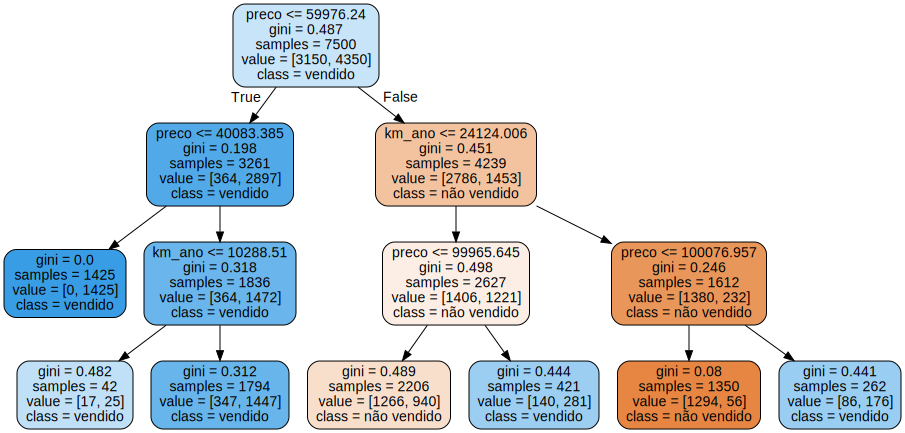

In [11]:
from sklearn.tree import export_graphviz
import graphviz

features = x.columns
dot_data = export_graphviz(model, feature_names = features,
                           filled = True, rounded = True, class_names = ['não vendido', 'vendido'])
graph = graphviz.Source(dot_data)
graph